<a href="https://colab.research.google.com/github/simsekergun/DATA601/blob/main/Project2/DATA601_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATA 601 Project-2
Due date: May 19, 2022. 23:59 pm.<br>
Groups will be determined at the April 29 class. <br>
<br>

For your second project, you will be working on the flights dataset that we used earlier. <br>
We have 5 csv files and 5 Excel files. You can learn more about the content of the csv files at <br>
https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf
<br>
<br>
<b> FILES (https://github.com/simsekergun/DATA601/tree/main/Project2/datasets) </b>
* flights2DCMDVA.xlsx (Note that this is a smaller version of the original NYCflights13.csv data) <br>
* airlines.csv <br>
* airports.csv <br>
* planes.csv <br>
* weatherNYhourly.csv (NY daily weather)<br>
* weatherMDdaily.xlsx (MD daily temperature/precip/snow data) <br>
* weatherNYdaily.xlsx (NY daily temperature/precip/snow data) <br>
* federal-holidays-2013.xlsx <br>
* flights_test_data.xlsx (only needed for Q4 and Q5)<br>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datasets = [i for i in os.listdir('./datasets') if '.' in i]
csv_files = [i for i in datasets if i.split('.')[1] == 'csv']
excel_files = [i for i in datasets if i.split('.')[1] in ['xlsx', 'xls']]

In [3]:
for j,i in enumerate(csv_files, 1):
    variable_name = i.split('.')[0]
    globals()[variable_name] = pd.read_csv('./datasets/' + i)
    print(str(j) + ' - csv dataset varibale name :- ' + variable_name)

1 - csv dataset varibale name :- airlines
2 - csv dataset varibale name :- airports
3 - csv dataset varibale name :- flights
4 - csv dataset varibale name :- planes
5 - csv dataset varibale name :- weatherNYhourly


In [4]:
for j,i in enumerate(excel_files, 1):
    variable_name = i.split('.')[0].replace('-','_')
    globals()[variable_name] = pd.read_excel('./datasets/' + i)
    print(str(j) + ' - excel dataset varibale name :- ' + variable_name)

1 - excel dataset varibale name :- federal_holidays_2013
2 - excel dataset varibale name :- flights2DCMDVA
3 - excel dataset varibale name :- flights_test_data
4 - excel dataset varibale name :- weatherMDdaily
5 - excel dataset varibale name :- weatherNYdaily


In [5]:
weatherMDdaily

,Date,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth
0,2013-01-01,44,34,0,0,0
1,2013-01-02,37,26,0,0,0
2,2013-01-03,38,22,0,0,0
3,2013-01-04,42,23,0,0,0
4,2013-01-05,43,31,T,0,0
...,...,...,...,...,...,...
360,2013-12-27,49,22,0,0,0
361,2013-12-28,58,28,0,0,0
362,2013-12-29,47,39,1.09,0,0
363,2013-12-30,47,32,0,0,0


In [6]:
merged_data = flights2DCMDVA.merge(planes, on = 'tailnum', how = 'left')

In [7]:
merged_data.head(3)

,year_x,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,...,hour,minute,year_y,type,manufacturer,model,engines,seats,speed,engine
0,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,...,6.0,29.0,2007.0,Fixed wing multi engine,BOEING,737-7H4,2.0,140.0,NaN,Turbo-fan
1,2013,1,1,848.0,853.0,1001.0,851.0,MQ,N942MQ,3944,...,8.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,1,1,1059.0,-1.0,1201.0,-14.0,WN,N505SW,321,...,10.0,59.0,1990.0,Fixed wing multi engine,BOEING,737-5H4,2.0,149.0,NaN,Turbo-jet


### Sanity Check

In [8]:
merged_data.dtypes

year_x            int64
month             int64
day               int64
dep_time        float64
dep_delay       float64
arr_time        float64
arr_delay       float64
carrier          object
tailnum          object
flight            int64
origin           object
dest             object
air_time        float64
distance          int64
hour            float64
minute          float64
year_y          float64
type             object
manufacturer     object
model            object
engines         float64
seats           float64
speed           float64
engine           object
dtype: object

In [9]:
def null_check(df):
    temp = df.isna().sum(axis = 0)
    return pd.DataFrame([temp, round(temp * 100/ df.shape[0], 2)], index = ['Count', 'Percentage']).T.sort_values('Count', ascending = False)

null_check(merged_data)

,Count,Percentage
speed,17156.0,99.94
year_y,3059.0,17.82
engine,2872.0,16.73
seats,2872.0,16.73
engines,2872.0,16.73
model,2872.0,16.73
manufacturer,2872.0,16.73
type,2872.0,16.73
air_time,1002.0,5.84
arr_delay,1002.0,5.84


Let's drop `speed` column as it contains 99% of null values

In [10]:
merged_data.drop('speed', axis = 1, inplace = True)

In [11]:
merged_data.shape

(17166, 23)

In [12]:
num_vars = [i for i in merged_data.columns if merged_data[i].nunique() > 1000]
cat_vars = [i for i in merged_data.columns if merged_data[i].nunique() < 50]
cat_vars

['year_x',
 'month',
 'day',
 'carrier',
 'origin',
 'dest',
 'distance',
 'hour',
 'year_y',
 'type',
 'manufacturer',
 'model',
 'engines',
 'seats',
 'engine']

array([[<AxesSubplot:title={'center':'year_x'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'distance'}>,
        <AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'year_y'}>],
       [<AxesSubplot:title={'center':'engines'}>,
        <AxesSubplot:title={'center':'seats'}>, <AxesSubplot:>]],
      dtype=object)

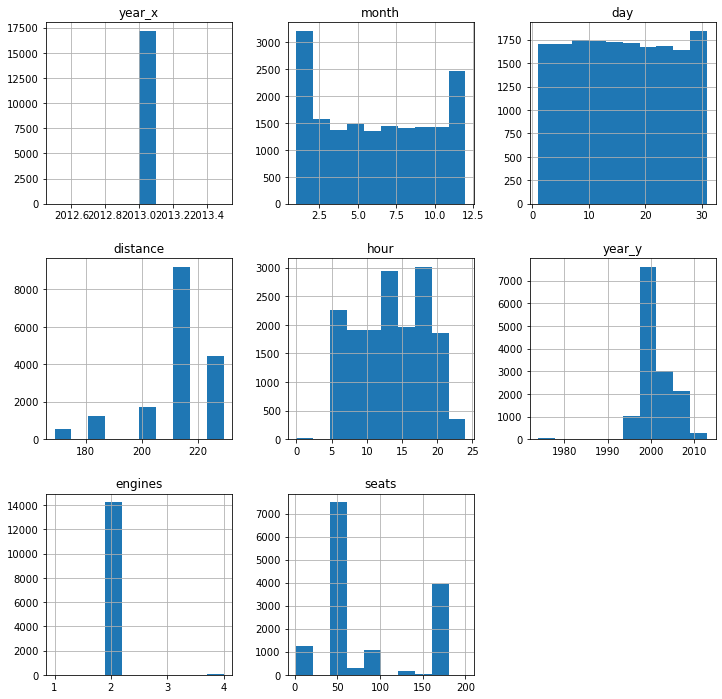

In [13]:
merged_data[cat_vars].hist(figsize = (12, 12))

We are only interested in flights from NY to three local airports:
* IAD: Dulles International Airport
* BWI: Baltimore/Washington International Thurgood Marshall Airport
* DCA: Ronald Reagan Washington National Airport

After carrying out EDA, please work on the following questions. You will need to submit your notebook and report (as a pdf file). <br> 
The report should include
* Names of the students, Title of the project (e.g. DATA 601 | Project 2| NY-DC/MD/VA Flights), and date
* A brief introduction
* Clear answers to the questions. Make sure that you have enough number of images with proper figure captions and numbering.

Answer the following questions or complete the tasks <br>

#### Question/Task 1
a. Calculate the total number of seats for all the planned flights for each destination separately? <br>
b. What is the day of the year with the highest number of flights? <br>
c. What is the day of the year with the highest number of seats available on that day? <br>

##### a

In [14]:
merged = flights2DCMDVA.merge(planes, on = 'tailnum', how = 'inner')

merged.groupby('dest')[['seats']].sum()

,seats
dest,
BWI,96135
DCA,906225
IAD,296004


##### b

In [15]:
flights2DCMDVA['Date'] = pd.to_datetime(flights2DCMDVA[['year', 'month', 'day']])
flights2DCMDVA.value_counts('Date').sort_values(ascending = False).head()

Date
2013-01-17    61
2013-01-11    61
2013-02-07    60
2013-01-08    60
2013-01-14    60
dtype: int64

##### c

In [16]:
merged = flights2DCMDVA.merge(planes, on = 'tailnum', how = 'inner')

merged.groupby('Date')[['seats']].sum().sort_values('seats', ascending = False).head()

,seats
Date,
2013-02-28,5379
2013-01-11,5318
2013-01-07,5272
2013-01-24,5268
2013-02-07,5267


#### Question/Task 2
a. What day of the year most cancellations happened? <br>
b. Is there any relationship between the weather datasets and cancellations? If yes, describe it and justify with a statistical model (hypothesis testing).<br>
c. Is there any relationship between the Federal Holiday Schedule and cancellations? If yes, describe it and justify with a statistical model (hypothesis testing).<br>
d. What is the total number of seats for the cancelled flights? If we assume the average flight price of $50, what is the total economis loss?<br>
e. Determine the ratio of cancelled flights/planned flights for each airline company, list it, and determine the most and least reliable airline company (most reliable = the one that has the smallest ratio of cancelled/planned)<br>

##### a

In [17]:
flights2DCMDVA['MD_cancelled'] = flights2DCMDVA.dep_time.isna()

flights2DCMDVA['NY_cancelled'] = flights2DCMDVA.arr_time.isna()

cancelled_MD = flights2DCMDVA.groupby('Date')[['MD_cancelled']].sum().sort_values('MD_cancelled', ascending = False).reset_index()

cancelled_NY = flights2DCMDVA.groupby('Date')[['NY_cancelled']].sum().sort_values('NY_cancelled', ascending = False).reset_index()

In [18]:
# Flights cancelled in MD

cancelled_MD.head()

,Date,MD_cancelled
0,2013-03-06,46
1,2013-02-08,33
2,2013-09-12,25
3,2013-03-08,23
4,2013-05-23,21


In [19]:
# Flights cancelled in NY

cancelled_NY.head()

,Date,NY_cancelled
0,2013-03-06,46
1,2013-02-08,33
2,2013-09-12,27
3,2013-02-11,23
4,2013-03-08,23


##### b

In [20]:
weatherNY_cancelled = weatherNYdaily.merge(cancelled_MD, on = 'Date', how = 'inner')

weatherMD_cancelled = weatherMDdaily.merge(cancelled_NY, on = 'Date', how = 'inner')

In [21]:
weatherNY_cancelled.head()

,Date,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth,MD_cancelled
0,2013-01-01,41,27,0,0,0,0
1,2013-01-02,35,23,0,0,0,0
2,2013-01-03,33,25,0,0,0,1
3,2013-01-04,39,30,0,0,0,1
4,2013-01-05,45,32,0,0,0,1


In [22]:
weatherMD_cancelled.head()

,Date,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth,NY_cancelled
0,2013-01-01,44,34,0,0,0,0
1,2013-01-02,37,26,0,0,0,0
2,2013-01-03,38,22,0,0,0,1
3,2013-01-04,42,23,0,0,0,1
4,2013-01-05,43,31,T,0,0,1


To test if weather impacts cancellations, we can check if the cancellations are linearly correlated to the weather variables. Then by conducting hypothesis testing on regression model, we can test if weather really impacts the cancellations.

Null Hypothesis: Weather impacts cancellations<br>
Alternate Hypotheses: Weather doesn't impact concellations

For the next group of questions/tasks, do not include the cancelled flights.

#### Question/Task 3
a. Calculate the average arrival delay for all the flights that took place in the same day and plot it (x = 1:365, y = daily average delay). On the same plot, please mark the Federal Holidays from the federal-holidays-2013.xlsx dataset.<br>
b. Is there a correlation between the weather datasets and daily average arrival delay? Justify your answer with a statistical model (hypothesis testing)<br>
c. Is there a correlation between the Federal Holiday Schedule and daily average arrival delay?<br>
d. Calculate the average arrival delay for all the flights for each arrival airport (e.g. IAD, DCA, and BWI) and determine most and least reliables (most reliable = the one that has the shortest average delay)<br>
e. Calculate the average arrival delay for all the airlines and determine most and least reliables (most reliable = the one that has the shortest average delay) <br>
f. What day of the week we had the highest average delay?<br>
g. Which one had a higher average delay: flights that took off in the morning (6 am to 10 am), noon (11 am to 2 pm), afternoon (3 pm to 5pm), or evening (6 pm to 10 pm)?<br>
h. Determine the number of airplanes used in these flights manufactured by BOEING, EMBRAER, and AURBUS separately. <br>
<br>

#### Question/Task 4
Build a linear regression model to estimate the arrival delay of the flights given in "fligts_test_data.xlsx". Note that you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with. In your report, please explain how you build the LR model and eloborate on its accuracy. 

#### Question/Task 5
Build a logistic regression model to guess the 3 cancelled flights given in "fligts_test_data.xlsx". Again, you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with. In your report, please explain how you build the LogReg model and eloborate on its accuracy.

### Question/Task 3
a. Calculate the average arrival delay for all the flights that took place in the same day and plot it (x = 1:365, y = daily average delay). On the same plot, please mark the Federal Holidays from the federal-holidays-2013.xlsx dataset.
b. Is there a correlation between the weather datasets and daily average arrival delay? Justify your answer with a statistical model (hypothesis testing)
c. Is there a correlation between the Federal Holiday Schedule and daily average arrival delay?
d. Calculate the average arrival delay for all the flights for each arrival airport (e.g. IAD, DCA, and BWI) and determine most and least reliables (most reliable = the one that has the shortest average delay)
e. Calculate the average arrival delay for all the airlines and determine most and least reliables (most reliable = the one that has the shortest average delay)
f. What day of the week we had the highest average delay?
g. Which one had a higher average delay: flights that took off in the morning (6 am to 10 am), noon (11 am to 2 pm), afternoon (3 pm to 5pm), or evening (6 pm to 10 pm)?
h. Determine the number of airplanes used in these flights manufactured by BOEING, EMBRAER, and AURBUS separately.


In [23]:
flights2DCMDVA.head(5)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,Date,MD_cancelled,NY_cancelled
0,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,LGA,BWI,40.0,185,6.0,29.0,2013-01-01,False,False
1,2013,1,1,848.0,853.0,1001.0,851.0,MQ,N942MQ,3944,JFK,BWI,41.0,184,8.0,48.0,2013-01-01,False,False
2,2013,1,1,1059.0,-1.0,1201.0,-14.0,WN,N505SW,321,LGA,BWI,43.0,185,10.0,59.0,2013-01-01,False,False
3,2013,1,1,1158.0,-2.0,1256.0,-4.0,WN,N783SW,1568,EWR,BWI,38.0,169,11.0,58.0,2013-01-01,False,False
4,2013,1,1,1316.0,2.0,1412.0,-3.0,EV,N11551,4340,EWR,BWI,38.0,169,13.0,16.0,2013-01-01,False,False


In [24]:
flights2DCMDVA_1=flights2DCMDVA[flights2DCMDVA['air_time'].notna()]


In [25]:
flights2DCMDVA_1['week_day']=flights2DCMDVA_1['Date'].dt.day_name()
flights2DCMDVA_1.head(5)

C:\Users\Bharath\AppData\Local\Temp/ipykernel_17640/738368354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights2DCMDVA_1['week_day']=flights2DCMDVA_1['Date'].dt.day_name()


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,Date,MD_cancelled,NY_cancelled,week_day
0,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,LGA,BWI,40.0,185,6.0,29.0,2013-01-01,False,False,Tuesday
1,2013,1,1,848.0,853.0,1001.0,851.0,MQ,N942MQ,3944,JFK,BWI,41.0,184,8.0,48.0,2013-01-01,False,False,Tuesday
2,2013,1,1,1059.0,-1.0,1201.0,-14.0,WN,N505SW,321,LGA,BWI,43.0,185,10.0,59.0,2013-01-01,False,False,Tuesday
3,2013,1,1,1158.0,-2.0,1256.0,-4.0,WN,N783SW,1568,EWR,BWI,38.0,169,11.0,58.0,2013-01-01,False,False,Tuesday
4,2013,1,1,1316.0,2.0,1412.0,-3.0,EV,N11551,4340,EWR,BWI,38.0,169,13.0,16.0,2013-01-01,False,False,Tuesday


#### a .
Calculate the average arrival delay for all the flights that took place in the same day and plot it (x = 1:365, y = daily average delay). On the same plot, please mark the Federal Holidays from the federal-holidays-2013.xlsx dataset.

In [26]:
daily_arr_delay=flights2DCMDVA_1.groupby("Date")["arr_delay"].mean()
daily_arr_delay

Date
2013-01-01    34.075000
2013-01-02    23.702128
2013-01-03     8.040816
2013-01-04     5.326531
2013-01-05    -8.538462
                ...    
2013-12-27     2.090909
2013-12-28     1.272727
2013-12-29    26.740741
2013-12-30    -5.275862
2013-12-31    17.318182
Name: arr_delay, Length: 365, dtype: float64

In [27]:
federal_holidays_2013_1=federal_holidays_2013[1:11]
federal_holidays_2013_1
import arrow

d=[]
from datetime import datetime
for i in federal_holidays_2013_1['Federal holidays 2013']:
    d.append(arrow.get(i, 'MMMM D, YYYY').format('YYYY-MM-DD'))
d

federal_holidays_2013_1['Date'] = d
federal_holidays_2013_1

C:\Users\Bharath\AppData\Local\Temp/ipykernel_17640/4236471870.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  federal_holidays_2013_1['Date'] = d


,Federal holidays 2013,Unnamed: 1,https://www.calendarpedia.com/,Date
1,"January 1, 2013",New Year's Day,Tuesday,2013-01-01
2,"January 21, 2013",Martin Luther King Day,Monday,2013-01-21
3,"February 18, 2013",Presidents' Day,Monday,2013-02-18
4,"May 27, 2013",Memorial Day,Monday,2013-05-27
5,"July 4, 2013",Independence Day,Thursday,2013-07-04
6,"September 2, 2013",Labor Day,Monday,2013-09-02
7,"October 14, 2013",Columbus Day,Monday,2013-10-14
8,"November 11, 2013",Veterans Day,Monday,2013-11-11
9,"November 28, 2013",Thanksgiving Day,Thursday,2013-11-28
10,"December 25, 2013",Christmas Day,Wednesday,2013-12-25


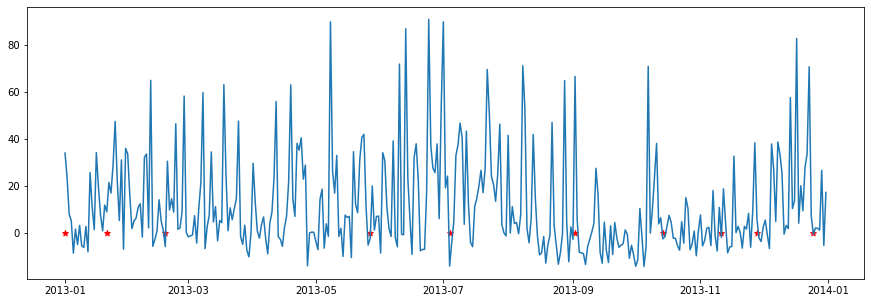

In [28]:
k=[0,0,0,0,0,0,0,0,0,0]
plt.subplots(figsize=(15,5))
plt.plot(daily_arr_delay)
#fig = plt.figure()
#fig.set_size_inches(20, 5)
plt.scatter(federal_holidays_2013_1['Date'],k,color='r',marker='*')
plt.show()

# b. 
Is there a correlation between the weather datasets and daily average arrival delay? Justify your answer with a statistical model (hypothesis testing)

In [29]:
daily_arr_delay1=daily_arr_delay.reset_index()
daily_arr_delay1

,Date,arr_delay
0,2013-01-01,34.075000
1,2013-01-02,23.702128
2,2013-01-03,8.040816
3,2013-01-04,5.326531
4,2013-01-05,-8.538462
...,...,...
360,2013-12-27,2.090909
361,2013-12-28,1.272727
362,2013-12-29,26.740741
363,2013-12-30,-5.275862


In [30]:
new = weatherMDdaily
new['daily_arr_delay']=daily_arr_delay1['arr_delay']
new

,Date,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth,daily_arr_delay
0,2013-01-01,44,34,0,0,0,34.075000
1,2013-01-02,37,26,0,0,0,23.702128
2,2013-01-03,38,22,0,0,0,8.040816
3,2013-01-04,42,23,0,0,0,5.326531
4,2013-01-05,43,31,T,0,0,-8.538462
...,...,...,...,...,...,...,...
360,2013-12-27,49,22,0,0,0,2.090909
361,2013-12-28,58,28,0,0,0,1.272727
362,2013-12-29,47,39,1.09,0,0,26.740741
363,2013-12-30,47,32,0,0,0,-5.275862


In [60]:
new.corr()

,Max Temp,Min Temp,daily_arr_delay
Max Temp,1.000000,0.933514,0.051003
Min Temp,0.933514,1.000000,0.172477
daily_arr_delay,0.051003,0.172477,1.000000


In [80]:
from scipy.stats import pearsonr
new1=new[pd.to_numeric(new['Precipitation'], errors='coerce').notnull()]
new1=new1[pd.to_numeric(new1['Snowfall'], errors='coerce').notnull()]
new1=new1[pd.to_numeric(new1['Snow Depth'], errors='coerce').notnull()]
c = ['Max Temp' ,'Min Temp' ,'Precipitation','Snowfall' ,'Snow Depth']
for i in c:
    stats,p= pearsonr(new1['daily_arr_delay'],new1['{}'.format(i)])
    if p>0.05:
        s='Independent(Uncorrelated)'
    else:
        s='Dependent(Correlated)'
    print('[{},daily_arr_delay]'.format(i),'-->','stats: %.2f  , p_value: %.2f' % (stats,p),'####',s)

[Max Temp,daily_arr_delay] --> stats: 0.07  , p_value: 0.21 #### Independent(Uncorrelated)
[Min Temp,daily_arr_delay] --> stats: 0.21  , p_value: 0.00 #### Dependent(Correlated)
[Precipitation,daily_arr_delay] --> stats: 0.41  , p_value: 0.00 #### Dependent(Correlated)
[Snowfall,daily_arr_delay] --> stats: 0.14  , p_value: 0.01 #### Dependent(Correlated)
[Snow Depth,daily_arr_delay] --> stats: 0.12  , p_value: 0.04 #### Dependent(Correlated)


In [32]:
new_NY = weatherNYdaily
new_NY['daily_arr_delay']=daily_arr_delay1['arr_delay']
new_NY

,Date,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth,daily_arr_delay
0,2013-01-01,41,27,0,0,0,34.075000
1,2013-01-02,35,23,0,0,0,23.702128
2,2013-01-03,33,25,0,0,0,8.040816
3,2013-01-04,39,30,0,0,0,5.326531
4,2013-01-05,45,32,0,0,0,-8.538462
...,...,...,...,...,...,...,...
360,2013-12-27,42,31,0,0,0,2.090909
361,2013-12-28,53,31,0,0,0,1.272727
362,2013-12-29,49,38,1.18,0,0,26.740741
363,2013-12-30,47,24,0,0,0,-5.275862


In [76]:
new_NY.corr()

,Max Temp,Min Temp,daily_arr_delay
Max Temp,1.000000,0.964321,0.007396
Min Temp,0.964321,1.000000,0.096129
daily_arr_delay,0.007396,0.096129,1.000000


In [79]:
new1=new_NY[pd.to_numeric(new_NY['Precipitation'], errors='coerce').notnull()]
new1=new1[pd.to_numeric(new1['Snowfall'], errors='coerce').notnull()]
new1=new1[pd.to_numeric(new1['Snow Depth'], errors='coerce').notnull()]
c = ['Max Temp' ,'Min Temp' ,'Precipitation','Snowfall' ,'Snow Depth']
for i in c:
    stats,p= pearsonr(new1['daily_arr_delay'],new1['{}'.format(i)])
    if p>0.05:
        s='Independent(Uncorrelated)'
    else:
        s='Dependent(Correlated)'
    print('[{},daily_arr_delay]'.format(i),'-->','stats: %.2f  , p_value: %.2f' % (stats,p),'####',s)

[Max Temp,daily_arr_delay] --> stats: -0.03  , p_value: 0.63 #### Independent(Uncorrelated)
[Min Temp,daily_arr_delay] --> stats: 0.08  , p_value: 0.19 #### Independent(Uncorrelated)
[Precipitation,daily_arr_delay] --> stats: 0.47  , p_value: 0.00 #### Dependent(Correlated)
[Snowfall,daily_arr_delay] --> stats: 0.26  , p_value: 0.00 #### Dependent(Correlated)
[Snow Depth,daily_arr_delay] --> stats: 0.09  , p_value: 0.13 #### Independent(Uncorrelated)


c. Is there a correlation between the Federal Holiday Schedule and daily average arrival delay?

In [34]:
new_F = federal_holidays_2013_1
new_F['daily_arr_delay']=daily_arr_delay1['arr_delay']
new_F

C:\Users\Bharath\AppData\Local\Temp/ipykernel_17640/432084854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_F['daily_arr_delay']=daily_arr_delay1['arr_delay']


,Federal holidays 2013,Unnamed: 1,https://www.calendarpedia.com/,Date,daily_arr_delay
1,"January 1, 2013",New Year's Day,Tuesday,2013-01-01,23.702128
2,"January 21, 2013",Martin Luther King Day,Monday,2013-01-21,8.040816
3,"February 18, 2013",Presidents' Day,Monday,2013-02-18,5.326531
4,"May 27, 2013",Memorial Day,Monday,2013-05-27,-8.538462
5,"July 4, 2013",Independence Day,Thursday,2013-07-04,1.707317
6,"September 2, 2013",Labor Day,Monday,2013-09-02,-4.883333
7,"October 14, 2013",Columbus Day,Monday,2013-10-14,3.288136
8,"November 11, 2013",Veterans Day,Monday,2013-11-11,-5.433333
9,"November 28, 2013",Thanksgiving Day,Thursday,2013-11-28,-6.100000
10,"December 25, 2013",Christmas Day,Wednesday,2013-12-25,2.813559


In [35]:
new_F['Date'] = pd.to_datetime(new_F['Date'])
new_F=new_F.merge(new_NY, on='Date', how='left')
new_F

C:\Users\Bharath\AppData\Local\Temp/ipykernel_17640/953625559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_F['Date'] = pd.to_datetime(new_F['Date'])


,Federal holidays 2013,Unnamed: 1,https://www.calendarpedia.com/,Date,daily_arr_delay_x,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth,daily_arr_delay_y
0,"January 1, 2013",New Year's Day,Tuesday,2013-01-01,23.702128,41,27,0,0,0,34.075000
1,"January 21, 2013",Martin Luther King Day,Monday,2013-01-21,8.040816,33,26,0.03,0.1,0,9.090909
2,"February 18, 2013",Presidents' Day,Monday,2013-02-18,5.326531,36,18,0,0,0,-5.745763
3,"May 27, 2013",Memorial Day,Monday,2013-05-27,-8.538462,70,48,0,0,0,-2.232558
4,"July 4, 2013",Independence Day,Thursday,2013-07-04,1.707317,84,72,0,0,0,-14.033333
5,"September 2, 2013",Labor Day,Monday,2013-09-02,-4.883333,82,72,T,0,0,66.685714
6,"October 14, 2013",Columbus Day,Monday,2013-10-14,3.288136,66,49,0,0,0,-2.428571
7,"November 11, 2013",Veterans Day,Monday,2013-11-11,-5.433333,54,43,0,0,0,-1.820000
8,"November 28, 2013",Thanksgiving Day,Thursday,2013-11-28,-6.100000,37,30,0,0,0,6.103448
9,"December 25, 2013",Christmas Day,Wednesday,2013-12-25,2.813559,32,20,0,0,0,-0.521739


In [36]:
new_F.corr()

,daily_arr_delay_x,Max Temp,Min Temp,daily_arr_delay_y
daily_arr_delay_x,1.000000,-0.404189,-0.415256,0.149912
Max Temp,-0.404189,1.000000,0.971898,0.181356
Min Temp,-0.415256,0.971898,1.000000,0.256795
daily_arr_delay_y,0.149912,0.181356,0.256795,1.000000


d. Calculate the average arrival delay for all the flights for each arrival airport (e.g. IAD, DCA, and BWI) and determine most and least reliables (most reliable = the one that has the shortest average delay) 



In [37]:
m=flights.groupby(['dest']).mean() 
Avg_arr_delay =pd.DataFrame( m['arr_delay']).reset_index()
print('The Least Reliable Airport:')
print(Avg_arr_delay.max())
print('-----------------------')
print('The Most Reliable Airport:')
print(Avg_arr_delay.min())

The Least Reliable Airport:
dest               LAX
arr_delay    41.764151
dtype: object
-----------------------
The Most Reliable Airport:
dest         ABQ
arr_delay   -2.5
dtype: object


 e. Calculate the average arrival delay for all the airlines and determine most and least reliables (most reliable = the one that has the shortest average delay) 

In [38]:
m=flights.groupby(['carrier']).mean()
Avg_arr_delay =pd.DataFrame( m['arr_delay']).reset_index()
print('The Least Reliable Airline:')
print(Avg_arr_delay.max())
print('-----------------------')
print('The Most Reliable Airline:')
print(Avg_arr_delay.min())

The Least Reliable Airline:
carrier             YV
arr_delay    46.666667
dtype: object
-----------------------
The Most Reliable Airline:
carrier            9E
arr_delay   -6.915205
dtype: object


 f. What day of the week we had the highest average delay?

In [39]:
new_NY

,Date,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth,daily_arr_delay
0,2013-01-01,41,27,0,0,0,34.075000
1,2013-01-02,35,23,0,0,0,23.702128
2,2013-01-03,33,25,0,0,0,8.040816
3,2013-01-04,39,30,0,0,0,5.326531
4,2013-01-05,45,32,0,0,0,-8.538462
...,...,...,...,...,...,...,...
360,2013-12-27,42,31,0,0,0,2.090909
361,2013-12-28,53,31,0,0,0,1.272727
362,2013-12-29,49,38,1.18,0,0,26.740741
363,2013-12-30,47,24,0,0,0,-5.275862


In [40]:
import datetime
new_NY['day_of_week'] = new_NY['Date'].dt.day_name()
new_NY

,Date,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth,daily_arr_delay,day_of_week
0,2013-01-01,41,27,0,0,0,34.075000,Tuesday
1,2013-01-02,35,23,0,0,0,23.702128,Wednesday
2,2013-01-03,33,25,0,0,0,8.040816,Thursday
3,2013-01-04,39,30,0,0,0,5.326531,Friday
4,2013-01-05,45,32,0,0,0,-8.538462,Saturday
...,...,...,...,...,...,...,...,...
360,2013-12-27,42,31,0,0,0,2.090909,Friday
361,2013-12-28,53,31,0,0,0,1.272727,Saturday
362,2013-12-29,49,38,1.18,0,0,26.740741,Sunday
363,2013-12-30,47,24,0,0,0,-5.275862,Monday


In [41]:
import matplotlib.pyplot as plt
week_avg_delay =new_NY.groupby('day_of_week').sum().reset_index()[['day_of_week','daily_arr_delay']]
week_avg_delay.rename(columns = {'daily_arr_delay':'Total_delay'}, inplace = True)
week_avg_delay

,day_of_week,Total_delay
0,Friday,732.732220
1,Monday,945.487376
2,Saturday,250.169875
3,Sunday,404.703419
4,Thursday,718.470747
5,Tuesday,613.226342
6,Wednesday,630.137333


Text(0, 0.5, 'Total_delay')

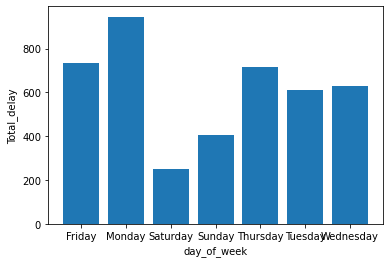

In [42]:
plt.bar(week_avg_delay['day_of_week'],week_avg_delay['Total_delay'])
plt.xlabel('day_of_week')
plt.ylabel('Total_delay')

-> On observing plot Monday has highest delay compared to other days followed by friday and thursday respectively.

g. Which one had a higher average delay: flights that took off in the morning (6 am to 10 am), noon (11 am to 2 pm), afternoon (3 pm to 5pm), or evening (6 pm to 10 pm)?

In [43]:
flight_session = flights
flight_session['daily_arr_delay']=daily_arr_delay1['arr_delay']
flights1=flight_session.dropna()
flights1

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,daily_arr_delay
0,361,2013,1,1,1315.0,-2.0,1413.0,-10.0,EV,N13538,4112,EWR,ALB,33.0,143,13.0,15.0,34.075000
1,570,2013,1,1,1655.0,34.0,1804.0,40.0,EV,N19554,3260,EWR,ALB,36.0,143,16.0,55.0,23.702128
2,785,2013,1,1,2056.0,52.0,2156.0,44.0,EV,N12540,4170,EWR,ALB,31.0,143,20.0,56.0,8.040816
3,1280,2013,1,2,1332.0,5.0,1419.0,-14.0,EV,N14153,4316,EWR,ALB,33.0,143,13.0,32.0,5.326531
4,1537,2013,1,2,1746.0,85.0,1835.0,71.0,EV,N14153,3260,EWR,ALB,31.0,143,17.0,46.0,-8.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,5678,2013,1,7,1454.0,-6.0,1739.0,-3.0,DL,N627DL,2347,LGA,ATL,113.0,762,14.0,54.0,2.090909
361,5723,2013,1,7,1538.0,-7.0,1756.0,-21.0,DL,N345NW,1942,EWR,ATL,111.0,746,15.0,38.0,1.272727
362,5737,2013,1,7,1548.0,0.0,1828.0,-2.0,DL,N3766,95,JFK,ATL,110.0,760,15.0,48.0,26.740741
363,5745,2013,1,7,1552.0,-8.0,1823.0,-11.0,FL,N926AT,620,LGA,ATL,113.0,762,15.0,52.0,-5.275862


In [44]:
k=[]
for i in (flights1['dep_time']):
   # print(i)
    k.append(int(float((str(i)[:2]))))
flights1["Hours"]=k
flights1

C:\Users\Bharath\AppData\Local\Temp/ipykernel_17640/1328254390.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights1["Hours"]=k


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,daily_arr_delay,Hours
0,361,2013,1,1,1315.0,-2.0,1413.0,-10.0,EV,N13538,4112,EWR,ALB,33.0,143,13.0,15.0,34.075000,13
1,570,2013,1,1,1655.0,34.0,1804.0,40.0,EV,N19554,3260,EWR,ALB,36.0,143,16.0,55.0,23.702128,16
2,785,2013,1,1,2056.0,52.0,2156.0,44.0,EV,N12540,4170,EWR,ALB,31.0,143,20.0,56.0,8.040816,20
3,1280,2013,1,2,1332.0,5.0,1419.0,-14.0,EV,N14153,4316,EWR,ALB,33.0,143,13.0,32.0,5.326531,13
4,1537,2013,1,2,1746.0,85.0,1835.0,71.0,EV,N14153,3260,EWR,ALB,31.0,143,17.0,46.0,-8.538462,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,5678,2013,1,7,1454.0,-6.0,1739.0,-3.0,DL,N627DL,2347,LGA,ATL,113.0,762,14.0,54.0,2.090909,14
361,5723,2013,1,7,1538.0,-7.0,1756.0,-21.0,DL,N345NW,1942,EWR,ATL,111.0,746,15.0,38.0,1.272727,15
362,5737,2013,1,7,1548.0,0.0,1828.0,-2.0,DL,N3766,95,JFK,ATL,110.0,760,15.0,48.0,26.740741,15
363,5745,2013,1,7,1552.0,-8.0,1823.0,-11.0,FL,N926AT,620,LGA,ATL,113.0,762,15.0,52.0,-5.275862,15


In [45]:
col=[]
for i in flights1['hour'] :
    if i >= 6 and i<=10:
        col.append('morning')
    elif i >= 11 and i<=14:
        col.append('noon')
    elif i >= 15 and i<=17:
        col.append('afternoon')
    elif i >= 18 and i<=22:
        col.append('evening')
    else:
        col.append('other')
        
flights1['session'] = col

C:\Users\Bharath\AppData\Local\Temp/ipykernel_17640/4231798761.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights1['session'] = col


In [46]:
y=pd.DataFrame( flights1.groupby('session').mean()['daily_arr_delay']).reset_index()
y

,session,daily_arr_delay
0,afternoon,11.248064
1,evening,13.120908
2,morning,12.929612
3,noon,10.682414
4,other,7.666560


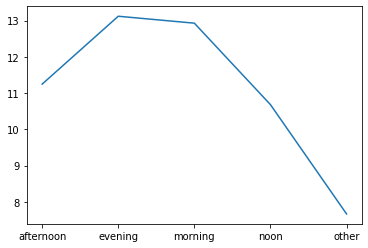

In [47]:
plt.plot(y['session'],y['daily_arr_delay'])

->Above plot says that evening flights has higher delay time.

#h. Determine the number of airplanes used in these flights manufactured by BOEING, EMBRAER, and AURBUS separately.


In [48]:
planes['manufacturer'].unique()

array(['EMBRAER', 'AIRBUS INDUSTRIE', 'BOEING', 'AIRBUS',
       'BOMBARDIER INC', 'CESSNA', 'JOHN G HESS', 'GULFSTREAM AEROSPACE',
       'SIKORSKY', 'PIPER', 'AGUSTA SPA', 'PAIR MIKE E', 'DOUGLAS',
       'BEECH', 'BELL', 'AVIAT AIRCRAFT INC', 'STEWART MACO',
       'LEARJET INC', 'MCDONNELL DOUGLAS', 'CIRRUS DESIGN CORP',
       'HURLEY JAMES LARRY', 'KILDALL GARY', 'LAMBERT RICHARD',
       'BARKER JACK L', 'AMERICAN AIRCRAFT INC', 'ROBINSON HELICOPTER CO',
       'FRIEDEMANN JON', 'LEBLANC GLENN T', 'MARZ BARRY', 'DEHAVILLAND',
       'CANADAIR', 'CANADAIR LTD', 'MCDONNELL DOUGLAS CORPORATION',
       'MCDONNELL DOUGLAS AIRCRAFT CO', 'AVIONS MARCEL DASSAULT'],
      dtype=object)

In [49]:
planes_EMBRAER = planes[planes['manufacturer']=='EMBRAER']

planes_BOEING = planes[planes['manufacturer']=='BOEING']

planes_AURBUS = planes[planes['manufacturer']=='AURBUS']
planes_AIRBUS = planes[planes['manufacturer']=='AIRBUS']


In [50]:
df_planes = flights
df_planes['new']=df_planes.tailnum.isin(planes_EMBRAER.tailnum)
df_planes=df_planes[df_planes['new']==True]
print('The no. of EMBRAER planes used is ',len(df_planes['tailnum'].unique()))

df_planes = flights
df_planes['new']=df_planes.tailnum.isin(planes_BOEING.tailnum)
df_planes=df_planes[df_planes['new']==True]
print('The no. of BOEING planes used is ',len(df_planes['tailnum'].unique()))

df_planes = flights
df_planes['new']=df_planes.tailnum.isin(planes_AURBUS.tailnum)
df_planes=df_planes[df_planes['new']==True]
print('The no. of AURBUS planes used is ',len(df_planes['tailnum'].unique()))

df_planes = flights
df_planes['new']=df_planes.tailnum.isin(planes_AIRBUS.tailnum)
df_planes=df_planes[df_planes['new']==True]
print('The no. of AIRBUS planes used is ',len(df_planes['tailnum'].unique()))

The no. of EMBRAER planes used is  299
The no. of BOEING planes used is  1421
The no. of AURBUS planes used is  0
The no. of AIRBUS planes used is  250


In [51]:
flights['cancelled'] = flights.dep_time.isna()
cancelled_flights = flights.groupby('Date')[['cancelled']].sum().reset_index()
cancelled_flights

KeyError: 'Date'

In [ ]:
weatherNYhourly

In [ ]:
weatherNYdaily['Snow Depth'].values

In [ ]:
[try len(i) except 2 for i in range(10)] 

In [ ]:
flights['calcelled'] = flights.dep_time.isna()

flights

## Exploratory Data Anaysis

In [ ]:
flights.head()

`Unnamed: 0` doesn't have any interpretation. Hence, removing the column/

In [ ]:
flights.drop(columns = ['Unnamed: 0'], inplace = True)

In [ ]:
flights.head()

In [ ]:
flights[flights.tailnum=='N13538']

In [ ]:
flights[flights.flight==4112]

In [ ]:
null = flights.isna().sum(axis = 0)
null_data = pd.DataFrame([null, round(null *100/flights.shape[0], 2)], index = ('Count', 'Percentage')).T
null_data[null_data.Count != 0]

In [ ]:
flights['Date'] = pd.to_datetime(flights[['year', 'month', 'day']])
flights.drop(columns = ['year', 'month', 'day'], inplace = True)

def scrape_time(time):
    if pd.isna(time):
        return time
    
    elif time == 2400:
        return '0:0'
    
    else:
        return str(int(time // 100)) + ':' + str(int(time % 100))
    

flights['arr_time'] = pd.to_datetime(flights['arr_time'].apply(scrape_time), format='%H:%M').dt.time

flights['dep_time'] = pd.to_datetime(flights['dep_time'].apply(scrape_time), format='%H:%M').dt.time

flights.head()

In [ ]:
flights.groupby(['Date'])['flight'].count().sort_values(ascending = False)

In [ ]:
flights.describe()

## Univariate Analysis

In [ ]:
sns.distplot(flights.dep_delay)

In [ ]:
fig, ax = plt.subplots(3,2)
for i,j in enumerate(['dep_delay','arr_delay','flight','air_time','distance','hour']):
    sns.distplot(flights['dep_delay'], ax = ax[0])